# Unit 5 - Financial Planning

In [1]:
# Import libraries and dependencies
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv('api.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']
print(f"The current price of BTC is ${btc_price:0.2f}")

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
print(f"The current price of ETH is ${eth_price:0.2f}")

The current price of BTC is $43599.00
The current price of ETH is $2414.63


In [4]:
# Compute current value of btc
my_btc = 1.2 
my_btc_value = my_btc * btc_price

# Compute current value of eth
my_eth = 5.3
my_eth_value = my_eth * eth_price

# Compute current value of my crypto portfolio
my_crypto_port = my_btc + my_eth
my_crypto_value = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The current value of your {my_crypto_port} Crypto Portfolio is ${my_crypto_value:0.2f}")

The current value of your 1.2 BTC is $52318.80
The current value of your 5.3 ETH is $12797.54
The current value of your 6.5 Crypto Portfolio is $65116.34


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [5]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [6]:
# Format current date as ISO format
today = pd.Timestamp("2024-02-5", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_bars(tickers, timeframe, start = today, end = today).df

# Display sample data
df_portfolio

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2024-02-05 05:00:00+00:00,97.65,97.9100,97.56,33471,97.890,7656888,97.680584,AGG
2024-02-05 05:00:00+00:00,492.55,494.3778,490.23,537117,493.695,75685102,492.960626,SPY


In [7]:
# Reorganize the DataFrame. Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Drop the time component of the date
df_portfolio.index = df_portfolio.index.date

# Preview DataFrame
df_portfolio

AGG                                                       \
            close   high    low trade_count   open   volume       vwap   
2024-02-05  97.65  97.91  97.56       33471  97.89  7656888  97.680584   

               SPY                                                   \
             close      high     low trade_count     open    volume   
2024-02-05  492.55  494.3778  490.23      537117  493.695  75685102   

                        
                  vwap  
2024-02-05  492.960626

In [8]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"]
spy_close_price = df_portfolio["SPY"]["close"]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $2024-02-05    97.65
Name: close, dtype: float64
Current SPY closing price: $2024-02-05    492.55
Name: close, dtype: float64


In [9]:
# Set current amount of shares
my_spy = 50
my_agg = 200

# Compute the current value of shares
my_spy_value = my_spy * spy_close_price[0]
my_agg_value = my_agg * agg_close_price[0]

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $24627.50
The current value of your 200 AGG shares is $19530.00


### Savings Health Analysis

In [10]:
# Consolidate financial assets data
savings_data = [my_crypto_value, my_spy_value + my_agg_value]

# Create savings DataFrame
savings_df = pd.DataFrame(savings_data, columns=['amount'], index = ["crypto", "shares"])

# Display savings DataFrame
display(savings_df)

,amount
crypto,65116.339
shares,44157.500


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

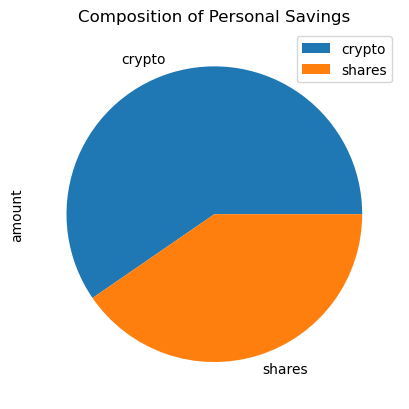

In [11]:
# Plot savings pie chart
savings_df.plot.pie(y="amount", title='Composition of Personal Savings')

In [12]:
# Set monthly household income
monthly_income = 12000
print(f"Monthly Income equals {monthly_income}")

# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(f"Emergency Fund equals {emergency_fund}")

# Calculate total amount of savings
total_portfolio_value = int(savings_df.sum()[0]) 
print(f"Total Portfolio Value equals {total_portfolio_value}")

Monthly Income equals 12000
Emergency Fund equals 36000
Total Portfolio Value equals 109273


In [13]:
# Validate saving health
if total_portfolio_value > emergency_fund:
    print("Congratulations you have enough money in this fund")
    
elif total_portfolio_value == emergency_fund:
    print("Congratulations you have reached an important financial goal of having just enough savings")
        
else:
    print(f"Sorry you are {emergency_fund} from reaching your goal")

Congratulations you have enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

### Import Dependencies

In [14]:
# # Set Alpaca API key and secret
# alpaca_api_key = os.getenv("ALPACA_API_KEY")
# alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# api = tradeapi.REST(
#     alpaca_api_key,
#     alpaca_secret_key,
#     api_version = "v2"
# )

### Get Past 3 Year's Worth of Price Data via Alpaca API Call for AGG & SPY

In [15]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp('2021-02-06', tz="America/New_York").isoformat()
end_date = pd.Timestamp('2024-02-06', tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["AGG","SPY"]

# Get 3 year's worth of historical price data
df_ticker = api.get_bars(tickers,timeframe,start=start_date,end=end_date).df

# Display sample data
df_ticker.head()

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2021-02-08 05:00:00+00:00,116.83,116.9285,116.7200,17012,116.75,5022996,116.827722,AGG
2021-02-09 05:00:00+00:00,116.88,116.9700,116.8215,15321,116.94,4766282,116.906891,AGG
2021-02-10 05:00:00+00:00,116.99,117.0100,116.9200,13889,116.97,5139131,116.976338,AGG
2021-02-11 05:00:00+00:00,116.85,117.0300,116.8000,12628,117.03,3597042,116.930158,AGG
2021-02-12 05:00:00+00:00,116.58,116.7400,116.5418,14201,116.67,3422139,116.628996,AGG


In [16]:
# Reorganize the DataFrame. Separate ticker data
AGG = df_ticker[df_ticker["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_ticker[df_ticker["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG,SPY], axis=1, keys=["AGG","SPY"])

# Display sample data
df_ticker.head()

AGG                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2021-02-08 05:00:00+00:00  116.83  116.9285  116.7200       17012  116.75   
2021-02-09 05:00:00+00:00  116.88  116.9700  116.8215       15321  116.94   
2021-02-10 05:00:00+00:00  116.99  117.0100  116.9200       13889  116.97   
2021-02-11 05:00:00+00:00  116.85  117.0300  116.8000       12628  117.03   
2021-02-12 05:00:00+00:00  116.58  116.7400  116.5418       14201  116.67   

                                                   SPY                  \
                            volume        vwap   close    high     low   
timestamp                                                                
2021-02-08 05:00:00+00:00  5022996  116.827722  390.52  390.56  388.35   
2021-02-09 05:00:00+00:00  4766282  116.906891  390.31  390.89  389.17   
2021-02-10 05:00:00+00:00  5139131  116.976338  390.17  392.28  387.50   
2021-02-11 05:00:00+00:00  3597042  116.930158  390.71  391.69  388.10   
2021-02-12 05:00:00+00:00  3422139  116.628996  392.73  392.90  389.77   

                                                                     
                          trade_count    open    volume        vwap  
timestamp                                                            
2021-02-08 05:00:00+00:00      240716  389.27  39380252  389.330088  
2021-02-09 05:00:00+00:00      235682  389.61  36248491  390.291798  
2021-02-10 05:00:00+00:00      352180  392.12  59678427  389.946332  
2021-02-11 05:00:00+00:00      272447  391.24  43822781  390.177930  
2021-02-12 05:00:00+00:00      251164  389.85  51799016  391.626538

In [17]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist = MCSimulation(portfolio_data = df_ticker, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2021-02-08 05:00:00+00:00  116.83  116.9285  116.7200       17012  116.75   
2021-02-09 05:00:00+00:00  116.88  116.9700  116.8215       15321  116.94   
2021-02-10 05:00:00+00:00  116.99  117.0100  116.9200       13889  116.97   
2021-02-11 05:00:00+00:00  116.85  117.0300  116.8000       12628  117.03   
2021-02-12 05:00:00+00:00  116.58  116.7400  116.5418       14201  116.67   

                                                                SPY          \
                            volume        vwap daily_return   close    high   
timestamp                                                                     
2021-02-08 05:00:00+00:00  5022996  116.827722          NaN  390.52  390.56   
2021-02-09 05:00:00+00:00  4766282  116.906891     0.000428  390.31  390.89   
2021-02-10 05:00:00+00:00  5139131  116.976338     0.000941  390.17  392.28   
2021-02-11 05:00:00+00:00  3597042  116.930158    -0.001197  390.71  391.69   
2021-02-12 05:00:00+00:00  3422139  116.628996    -0.002311  392.73  392.90   

                                                                             \
                              low trade_count    open    volume        vwap   
timestamp                                                                     
2021-02-08 05:00:00+00:00  388.35      240716  389.27  39380252  389.330088   
2021-02-09 05:00:00+00:00  389.17      235682  389.61  36248491  390.291798   
2021-02-10 05:00:00+00:00  387.50      352180  392.12  59678427  389.946332   
2021-02-11 05:00:00+00:00  388.10      272447  391.24  43822781  390.177930   
2021-02-12 05:00:00+00:00  389.77      251164  389.85  51799016  391.626538   

                                        
                          daily_return  
timestamp                               
2021-02-08 05:00:00+00:00          NaN  
2021-02-09 05:00:00+00:00    -0.000538  
2021-02-10 05:00:00+00:00    -0.000359  
2021-02-11 05:00:00+00:00     0.001384  
2021-02-12 05:00:00+00:00     0.005170

In [18]:
# Run a Monte Carlo simulation to forecast thirty years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.018169,0.994704,1.000913,0.994201,0.999041,1.008663,0.999959,1.002386,0.999496,1.004177,...,0.992979,0.996959,1.001562,0.989649,0.995914,1.005696,1.001990,1.009661,0.996178,0.999074
2,1.024072,0.994167,0.996409,0.993518,1.006886,1.003986,0.998312,1.010102,0.994494,1.000621,...,1.001314,1.006451,1.002896,0.985522,0.995419,1.002340,0.995491,1.007339,0.993742,0.995123
3,1.027057,0.993226,0.991008,0.995603,1.001502,0.992505,0.991459,1.010096,0.995708,1.006678,...,0.997813,1.000457,0.992912,0.989345,0.998572,0.995189,0.985307,1.015134,0.991092,0.999572
4,1.029960,0.988671,0.997157,1.002470,1.002940,0.989962,0.980609,1.006099,0.990363,1.015506,...,0.999146,1.009710,0.995193,0.988278,0.995241,0.996432,0.988260,1.023606,0.988627,1.001663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.784951,15.710626,1.614133,1.404022,1.828691,7.523909,1.233278,1.199219,2.775942,0.684436,...,8.219170,1.928936,2.431149,1.787388,0.939995,1.317558,0.970963,2.959961,1.836168,1.048867
7557,5.709701,15.775438,1.613443,1.395575,1.832800,7.551200,1.233878,1.193845,2.792381,0.686794,...,8.286968,1.937467,2.421060,1.791771,0.929772,1.309563,0.990196,2.960002,1.844269,1.067795
7558,5.754891,15.843955,1.622046,1.389091,1.856893,7.651480,1.242170,1.182885,2.787187,0.687417,...,8.166705,1.947198,2.433007,1.793875,0.919917,1.298445,0.987650,2.943515,1.841721,1.070386
7559,5.760386,15.664115,1.608002,1.392958,1.865921,7.619729,1.251631,1.183769,2.771828,0.688867,...,8.252213,1.949330,2.410566,1.776773,0.927688,1.305384,0.989804,2.928812,1.833676,1.070495


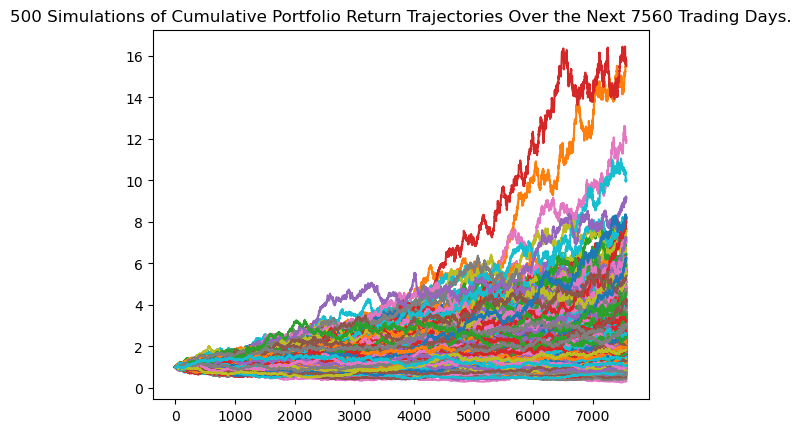

In [19]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

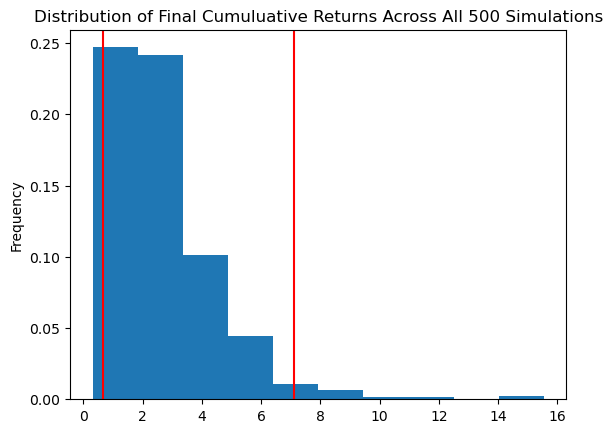

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              2.688488
std               1.826562
min               0.321846
25%               1.416614
50%               2.269787
75%               3.381962
max              15.540628
95% CI Lower      0.662034
95% CI Upper      7.114608
Name: 7560, dtype: float64


In [22]:
# Set Initial Investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments in stocks
even_ci_lower = round(even_tbl[8]*initial_investment,2)
even_ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next 5 years will end within in the range of $13240.69 and $142292.16.


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [23]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist = MCSimulation(portfolio_data = df_ticker, weights = [.20,.80], num_simulation = 500, num_trading_days = 252*10)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2021-02-08 05:00:00+00:00  116.83  116.9285  116.7200       17012  116.75   
2021-02-09 05:00:00+00:00  116.88  116.9700  116.8215       15321  116.94   
2021-02-10 05:00:00+00:00  116.99  117.0100  116.9200       13889  116.97   
2021-02-11 05:00:00+00:00  116.85  117.0300  116.8000       12628  117.03   
2021-02-12 05:00:00+00:00  116.58  116.7400  116.5418       14201  116.67   

                                                                SPY          \
                            volume        vwap daily_return   close    high   
timestamp                                                                     
2021-02-08 05:00:00+00:00  5022996  116.827722          NaN  390.52  390.56   
2021-02-09 05:00:00+00:00  4766282  116.906891     0.000428  390.31  390.89   
2021-02-10 05:00:00+00:00  5139131  116.976338     0.000941  390.17  392.28   
2021-02-11 05:00:00+00:00  3597042  116.930158    -0.001197  390.71  391.69   
2021-02-12 05:00:00+00:00  3422139  116.628996    -0.002311  392.73  392.90   

                                                                             \
                              low trade_count    open    volume        vwap   
timestamp                                                                     
2021-02-08 05:00:00+00:00  388.35      240716  389.27  39380252  389.330088   
2021-02-09 05:00:00+00:00  389.17      235682  389.61  36248491  390.291798   
2021-02-10 05:00:00+00:00  387.50      352180  392.12  59678427  389.946332   
2021-02-11 05:00:00+00:00  388.10      272447  391.24  43822781  390.177930   
2021-02-12 05:00:00+00:00  389.77      251164  389.85  51799016  391.626538   

                                        
                          daily_return  
timestamp                               
2021-02-08 05:00:00+00:00          NaN  
2021-02-09 05:00:00+00:00    -0.000538  
2021-02-10 05:00:00+00:00    -0.000359  
2021-02-11 05:00:00+00:00     0.001384  
2021-02-12 05:00:00+00:00     0.005170

In [24]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003521,0.986388,1.000172,0.992656,0.979095,1.004634,1.001426,1.001333,1.015904,0.994402,...,1.007469,0.988417,0.992382,1.016925,1.000036,0.998628,1.006353,1.006248,1.003090,1.011349
2,1.003630,0.988689,0.984023,1.001150,0.985230,1.006705,1.007941,1.003376,1.014018,0.986836,...,1.004306,0.985656,0.986870,1.014990,0.996168,1.024471,0.997142,1.006658,1.014097,1.006442
3,0.997242,0.994286,0.994341,0.999603,0.986020,1.005624,1.019706,0.997311,0.991666,0.989527,...,1.016241,0.993393,0.993074,1.015927,1.017754,1.020849,1.005840,0.988118,1.008486,1.003488
4,1.004376,0.986243,0.998105,0.984484,0.984669,1.001822,1.015854,1.016485,0.995445,1.000588,...,1.026997,1.002704,0.988620,1.011553,1.010901,1.026197,1.005862,0.986654,1.007708,0.993274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.863275,1.452041,3.185469,1.956245,1.017482,3.559310,2.899016,3.598506,1.807179,1.279829,...,2.078368,0.881668,1.441563,2.129536,2.982819,1.094537,1.192558,2.967342,0.837792,1.231870
2517,2.864072,1.438466,3.198205,1.980417,1.012482,3.548366,2.899801,3.634239,1.791794,1.304172,...,2.076750,0.880714,1.457012,2.124585,2.998815,1.099676,1.195935,2.970046,0.844977,1.243997
2518,2.865237,1.444448,3.142750,1.987444,1.023597,3.541841,2.912959,3.581262,1.793285,1.300187,...,2.098485,0.891836,1.457107,2.131009,2.956517,1.117240,1.204831,2.984078,0.847375,1.242727
2519,2.880476,1.467987,3.179026,1.950899,1.030701,3.570573,2.918403,3.575906,1.757253,1.316280,...,2.119238,0.883186,1.457971,2.088251,2.955029,1.128772,1.209312,3.010128,0.856619,1.236784


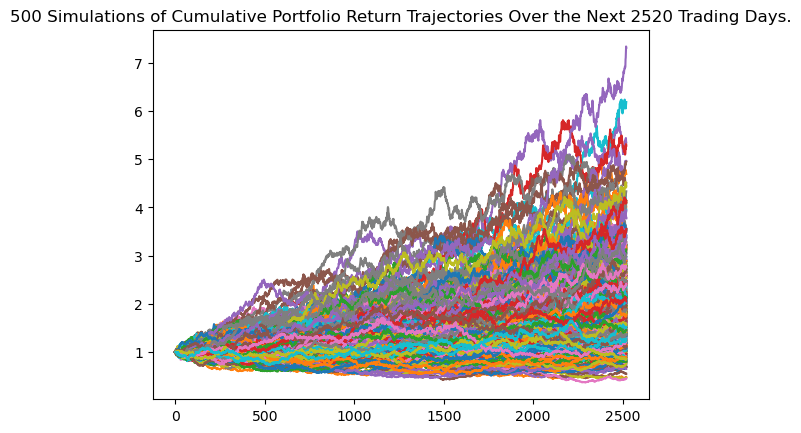

In [25]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

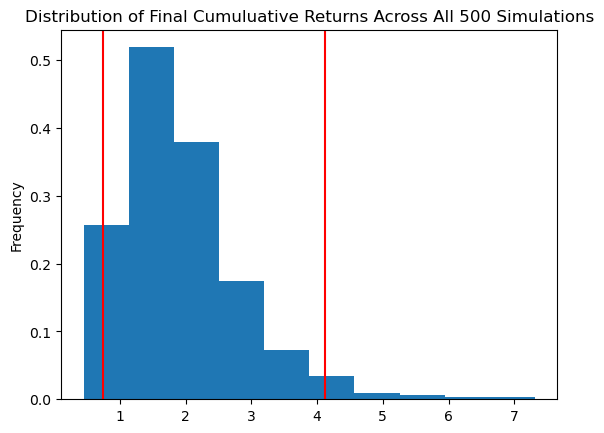

In [26]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              1.924244
std               0.900701
min               0.449266
25%               1.277724
50%               1.767006
75%               2.391855
max               7.314839
95% CI Lower      0.734404
95% CI Upper      4.119799
Name: 2520, dtype: float64


In [28]:
# Set Initial Investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments in stocks
even_ci_lower = round(even_tbl[8]*initial_investment,2)
even_ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next 5 years will end within in the range of $14688.07 and $82395.99.


In [29]:
# Yes, it is much more likely that credit union members can retire comfortably due to
# a much higher upper bound ($80K) and not that much less lower bound ($14K)